# Initial Setup

We import key functions to train a machine learning model as well as download the dataset we want to use.

Last but not least, we define a function that we use to plot a decision tree

In [392]:
#Importing Functions
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#Downloading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/maininspectionprediction.csv", sep=",")

#Defining a function for plotting decision trees
def plot_tree_classification(treemodel, X):
    from sklearn import tree
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel,filled=True,class_names=['0','1'],feature_names = X.columns,proportion=True,precision=2, impurity=False)

# Inspect the Data Set

In [393]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,failed_main_inspection,condition
0,Golf,2013,6741,Manual,95830,Diesel,0,74.3,1.6,VW,1.0,2
1,Golf,2016,10994,Manual,36513,Diesel,0,74.3,1.6,VW,0.0,4
2,Q5,2019,52635,Semi-Auto,2132,Diesel,145,34.5,3.0,Audi,0.0,3
3,E Class,2017,22770,Automatic,7320,Diesel,30,65.7,2.0,Mercedes,0.0,1
4,C Class,2018,20898,Automatic,19890,Petrol,145,50.4,2.0,Mercedes,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19862,Polo,2017,11539,Manual,22203,Petrol,20,60.1,1.2,VW,0.0,3
19863,A5,2016,19797,Manual,39948,Diesel,145,56.5,2.0,Audi,0.0,4
19864,Tiguan,2017,21494,Manual,19179,Diesel,145,50.4,2.0,VW,0.0,4
19865,Tiguan,2017,19574,Semi-Auto,27040,Diesel,145,49.6,2.0,VW,0.0,1


In [395]:
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19867 entries, 0 to 19866
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    19867 non-null  int64  
 1   price                   19867 non-null  int64  
 2   mileage                 19867 non-null  int64  
 3   tax                     19867 non-null  int64  
 4   mpg                     19867 non-null  float64
 5   engineSize              19867 non-null  float64
 6   failed_main_inspection  19867 non-null  float64
 7   condition               19867 non-null  int64  
 8   model_ 1 Series         19867 non-null  uint8  
 9   model_ 3 Series         19867 non-null  uint8  
 10  model_ 4 Series         19867 non-null  uint8  
 11  model_ 5 Series         19867 non-null  uint8  
 12  model_ A Class          19867 non-null  uint8  
 13  model_ A1               19867 non-null  uint8  
 14  model_ A3               19867 non-null

# Lab Session 1: Training a first Decision Tree

The dataset consists of the label "failed_main_inspection" and 58 other features. To train a machine learning model, we need to separate them into two objects. The label is called "y" and the features are called "X".


In [396]:
X = data.drop("failed_main_inspection",axis=1) #Create a copy of the data set with deleting "failed_main_inspection" feature.
y = data["failed_main_inspection"] #Saving the feature "failed_main_inspection"

In [397]:
X

,year,price,mileage,tax,mpg,engineSize,condition,model_ 1 Series,model_ 3 Series,model_ 4 Series,...,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,brand_Audi,brand_BMW,brand_Mercedes,brand_VW
0,2013,6741,95830,0,74.3,1.6,2,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,2016,10994,36513,0,74.3,1.6,4,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,2019,52635,2132,145,34.5,3.0,3,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,2017,22770,7320,30,65.7,2.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2018,20898,19890,145,50.4,2.0,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,2017,11539,22203,20,60.1,1.2,3,0,0,0,...,1,0,0,0,0,1,0,0,0,1
19863,2016,19797,39948,145,56.5,2.0,4,0,0,0,...,1,0,1,0,0,0,1,0,0,0
19864,2017,21494,19179,145,50.4,2.0,4,0,0,0,...,1,0,1,0,0,0,0,0,0,1
19865,2017,19574,27040,145,49.6,2.0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [398]:
y

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19862    0.0
19863    0.0
19864    0.0
19865    0.0
19866    0.0
Name: failed_main_inspection, Length: 19867, dtype: float64

We first train a decision tree with a "max_depth" of 2. After splitting twice, the process is stopped.

In [399]:
tree = DecisionTreeClassifier(max_depth=2).fit(X,y)

Plotting the trained decision tree

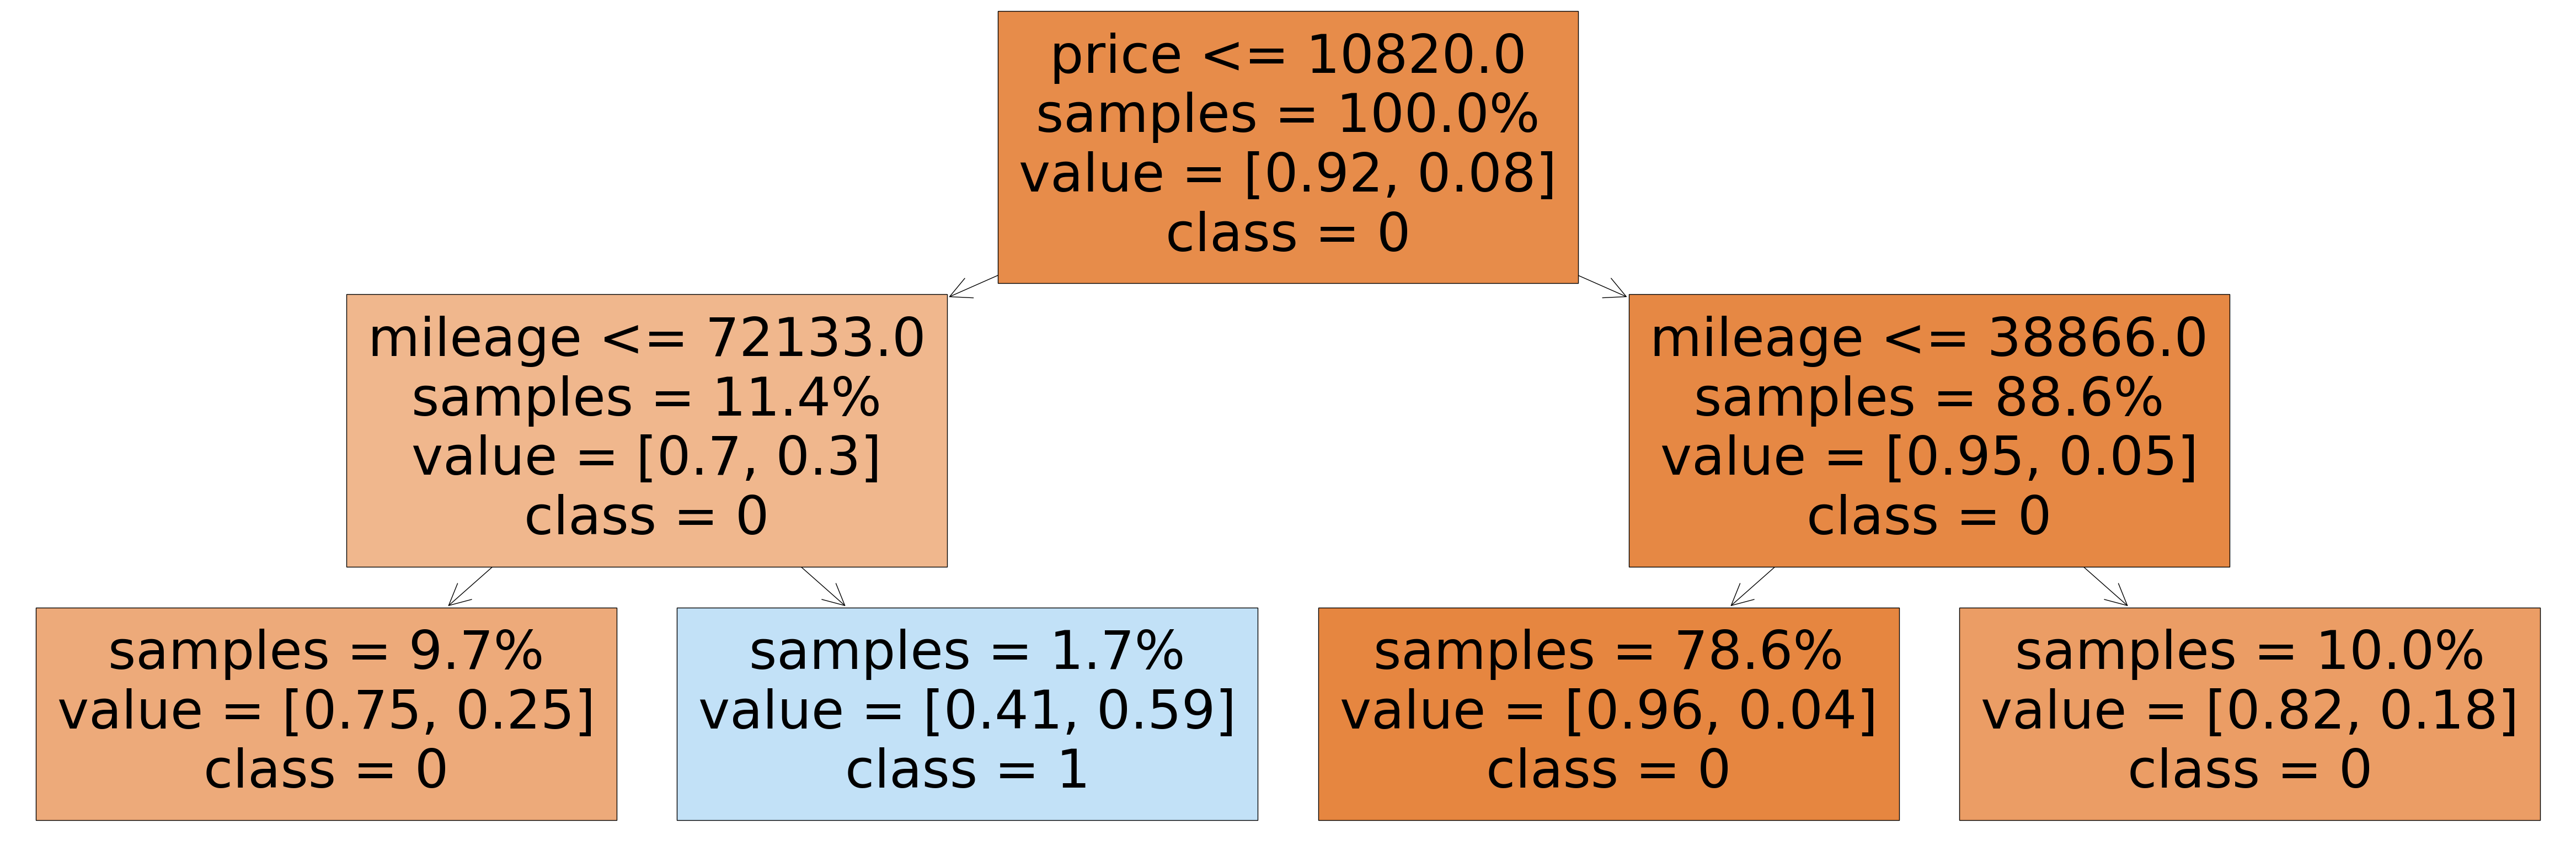

In [400]:
plot_tree_classification(tree, X)

We create predictions: "predict_proba" gives us the predictions.

- The first column gives the probability that a car will **pass** the main inspection.
- The second column gives the probability that a car will **fail** the main inspection.

Logically, the values add up to 1.

In [401]:
tree.predict_proba(X)

array([[0.40935673, 0.59064327],
       [0.96412556, 0.03587444],
       [0.96412556, 0.03587444],
       ...,
       [0.96412556, 0.03587444],
       [0.96412556, 0.03587444],
       [0.96412556, 0.03587444]])

"predict" provides us with the assignment to the classes "pass" and "fail". 1 means that a car fails the main inspection, 0 means the car will pass it.

All cars with an estimated probability of failing with >50% are set to the value 1.

In [402]:
tree.predict(X)

array([1., 0., 0., ..., 0., 0., 0.])

## Let's play around with Hyperparameters

Hyperparameters to be varied:

- **max_depth:** Maximum number of splits allowed.
- **min_samples_leaf:** The minimum number of clients that must be present in a leaf node.

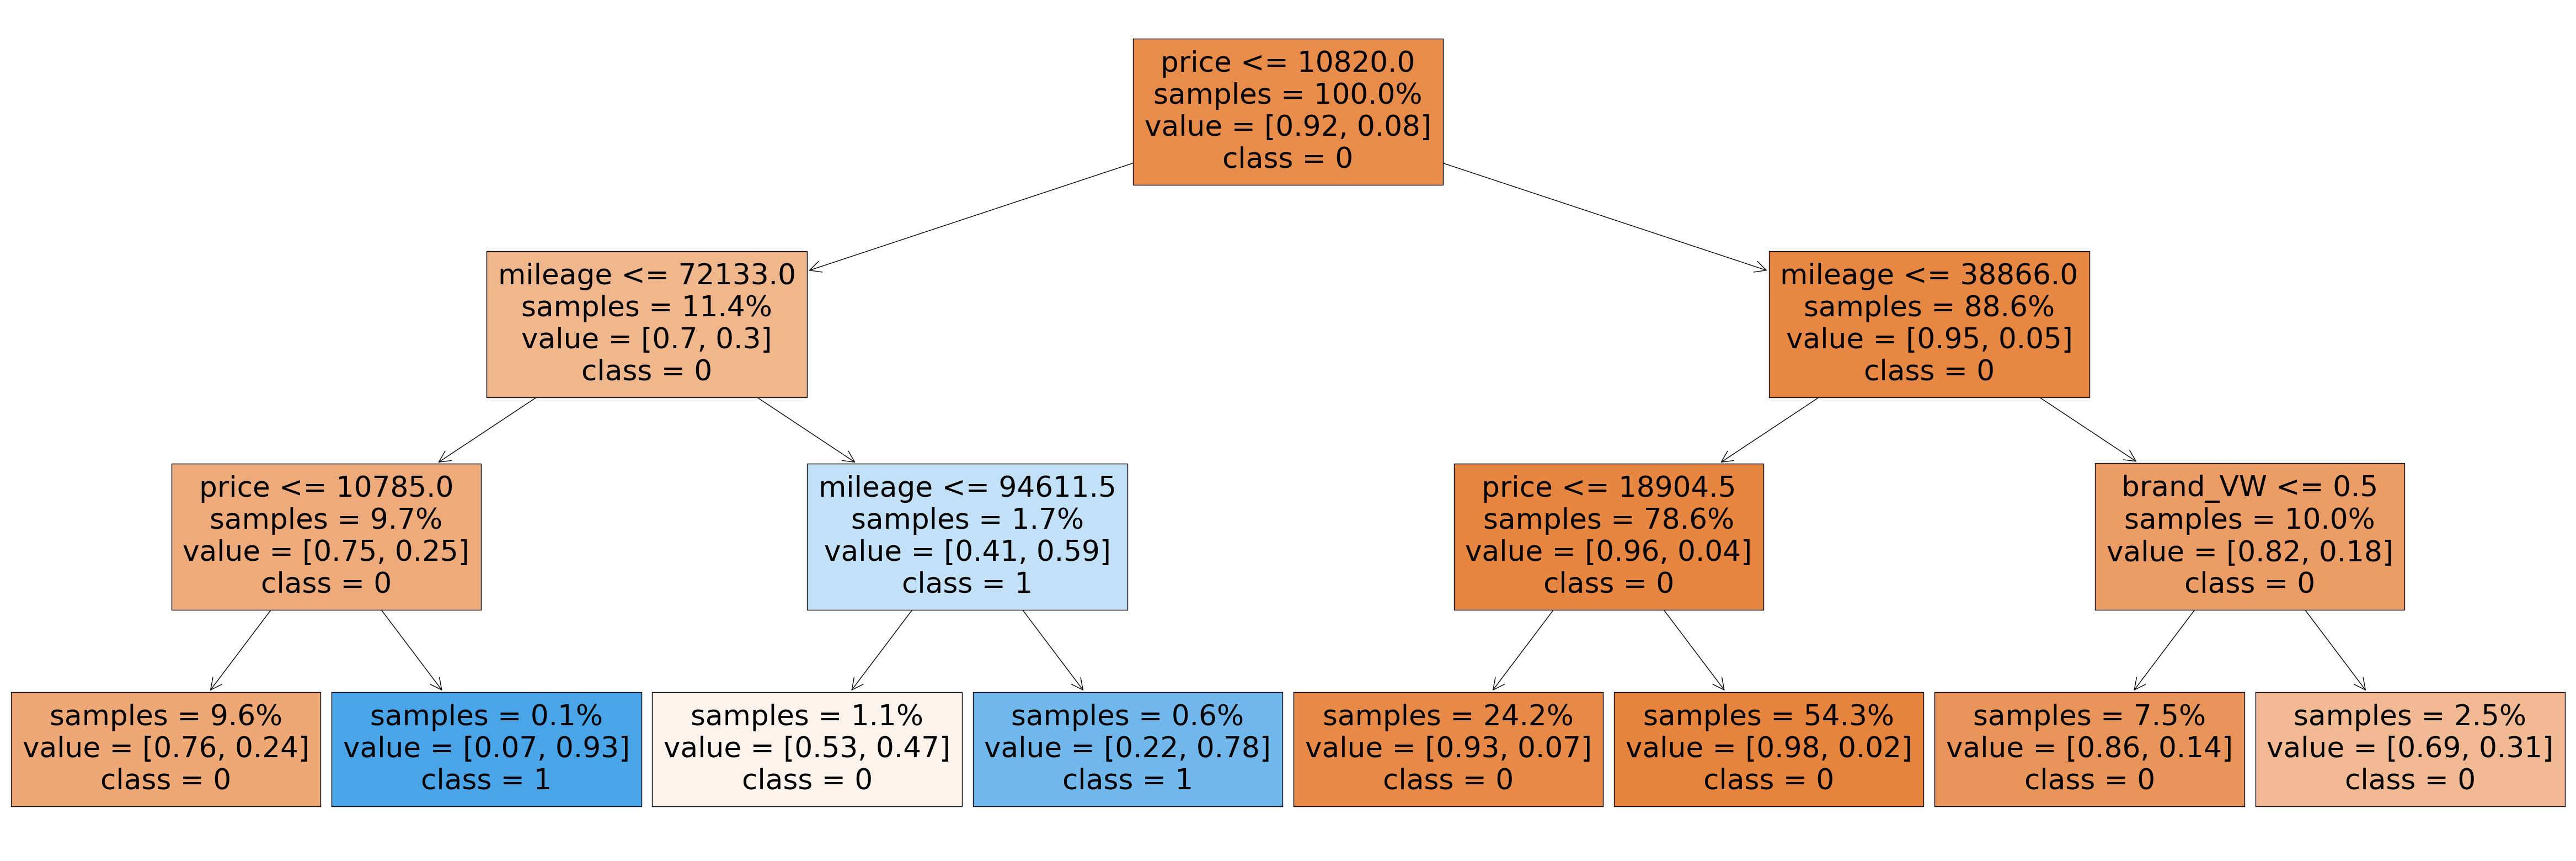

In [403]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1).fit(X,y)
plot_tree_classification(tree, X)

# Lab Session 2: Determining the Accuracy of our Predictions

To determine if the predictions made are accurate, we need to split our data into test and training data. We have already created two partial datasets in a previous step: y and X.

These are now transformed into a test and a training part respectively

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

We train again a new decision tree with a max_depth of 2



In [406]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

We create predictions and store them in the "y_pred" object.

In [407]:
y_pred = tree.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [408]:
y_test

4        0.0
11459    0.0
19708    0.0
6544     0.0
7212     0.0
        ... 
9396     0.0
8893     0.0
10372    0.0
1512     0.0
4579     0.0
Name: failed_main_inspection, Length: 5961, dtype: float64

Determine the accuracy of a model:

In [409]:
accuracy_score(y_test,y_pred)

0.9223284683777889